In [1]:
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data_officetel = pd.read_csv('/content/drive/MyDrive/Isolation_Forest_Data/data_officetel.csv', encoding='utf-8')
data_officetel.info()
data_officetel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73228 entries, 0 to 73227
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Floor                            73228 non-null  float64
 1   Building_Age                     73228 non-null  int64  
 2   JS_BA                            73228 non-null  float64
 3   Population                       73228 non-null  int64  
 4   IR                               73228 non-null  float64
 5   UR                               73228 non-null  float64
 6   LC_index                         73228 non-null  float64
 7   CA_index                         73228 non-null  float64
 8   TC_index                         73228 non-null  float64
 9   SDT_index                        73228 non-null  float64
 10  HSP_index                        73228 non-null  float64
 11  Crime_Rates                      73228 non-null  float64
 12  latitude          

,Floor,Building_Age,JS_BA,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,...,Region_성동구,Region_성북구,Region_송파구,Region_양천구,Region_영등포구,Region_용산구,Region_은평구,Region_종로구,Region_중구,Region_중랑구
0,7.0,8,40.56,557563,2.75,3.336898,75.152115,82.130486,79.115265,108.864845,...,0,0,0,0,0,0,0,0,0,0
1,7.0,7,35.34,557563,2.75,3.336898,75.434006,82.017120,79.275154,108.814003,...,0,0,0,0,0,0,0,0,0,0
2,4.0,4,56.04,486546,2.75,3.333628,75.694275,82.026985,79.855606,109.156708,...,0,0,0,0,0,0,0,0,0,0
3,10.0,7,40.55,486546,2.75,3.333628,75.587440,82.129082,79.624649,109.646271,...,0,0,0,0,0,0,0,0,0,0
4,15.0,7,27.10,486546,2.75,3.333628,75.692596,82.083466,79.699219,110.260963,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73223,8.0,17,30.06,365111,3.50,2.180964,106.263687,108.612099,111.924301,84.272804,...,0,0,0,0,0,0,0,0,0,0
73224,9.0,3,18.63,279374,3.50,2.173224,107.017700,109.395081,112.192070,84.808533,...,1,0,0,0,0,0,0,0,0,0
73225,5.0,12,39.49,657101,3.50,2.173987,103.733124,107.266983,110.864052,84.929161,...,0,0,1,0,0,0,0,0,0,0
73226,7.0,2,29.41,376139,3.50,2.168961,106.414925,108.185326,110.831055,83.754585,...,0,0,0,0,1,0,0,0,0,0


In [4]:
columns_to_drop = ['IR', 'CA_index', 'TC_index']
data_officetel = data_officetel.drop(columns = columns_to_drop)
data_officetel

,Floor,Building_Age,JS_BA,Population,UR,LC_index,SDT_index,HSP_index,Crime_Rates,latitude,...,Region_성동구,Region_성북구,Region_송파구,Region_양천구,Region_영등포구,Region_용산구,Region_은평구,Region_종로구,Region_중구,Region_중랑구
0,7.0,8,40.56,557563,3.336898,75.152115,108.864845,72.035851,1.386371,37.518459,...,0,0,0,0,0,0,0,0,0,0
1,7.0,7,35.34,557563,3.336898,75.434006,108.814003,72.714287,1.386371,37.494073,...,0,0,0,0,0,0,0,0,0,0
2,4.0,4,56.04,486546,3.333628,75.694275,109.156708,72.508171,0.947923,37.537012,...,0,0,0,0,0,0,0,0,0,0
3,10.0,7,40.55,486546,3.333628,75.587440,109.646271,72.342224,0.947923,37.539033,...,0,0,0,0,0,0,0,0,0,0
4,15.0,7,27.10,486546,3.333628,75.692596,110.260963,72.639282,0.947923,37.539415,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73223,8.0,17,30.06,365111,2.180964,106.263687,84.272804,151.519104,1.268818,37.551994,...,0,0,0,0,0,0,0,0,0,0
73224,9.0,3,18.63,279374,2.173224,107.017700,84.808533,150.890015,0.899977,37.563143,...,1,0,0,0,0,0,0,0,0,0
73225,5.0,12,39.49,657101,2.173987,103.733124,84.929161,146.993515,0.897009,37.495723,...,0,0,1,0,0,0,0,0,0,0
73226,7.0,2,29.41,376139,2.168961,106.414925,83.754585,149.904755,1.450147,37.537253,...,0,0,0,0,1,0,0,0,0,0


Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 64 is smaller than n_iter=300. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 58582, number of used features: 42
[LightGBM] [Info] Start training from score 23602.303502
Best parameters found:  {'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 128, 'n_estimators': 1500, 'max_depth': -1, 'learning_rate': 0.1}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 58582, number of used features: 42
[LightGBM] [Info] Start training from score 23602.303502
Mean Absolute Error (MAE): 1623.7431382015907
Root Mean Squared Error (RMSE): 3546.37153383634
Mean Absolute Percentage Error (MAPE): 6.704866679030175
R-Squared: 0

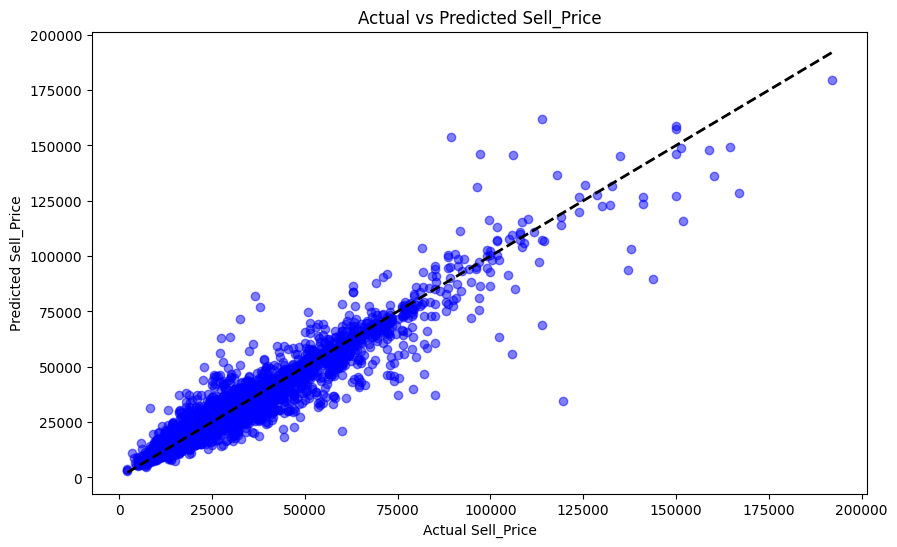

In [7]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (assuming you have already loaded it into a DataFrame called 'df')
# Replace 'df' with your actual DataFrame name
df = data_officetel

# Split the data into features (X) and target variable (y)
X = df.drop("Sell_Price", axis=1)
y = df["Sell_Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=283)

# Set hyperparameters for LightGBM model (adjust these based on your requirements)
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt'
    # Add other hyperparameters as per your requirement
}

# Create LightGBM dataset for training only
train_data = lgb.Dataset(X_train, label=y_train)

# Perform RandomizedSearchCV for hyperparameter tuning
model_lgb = lgb.LGBMRegressor()
random_grid = {
    'n_estimators': (300, 1500),
    'learning_rate': (0.01, 0.1),
    'num_leaves': (32, 128),
    'max_depth': (-1, 15),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1)

}
rscv = RandomizedSearchCV(estimator=model_lgb,
                          param_distributions=random_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_iter=300,
                          n_jobs=-1,
                          verbose=1,
                          random_state=742)

rscv.fit(X_train, y_train)

print("Best parameters found: ", rscv.best_params_)

# Train the model using LightGBM with best parameters
model = lgb.LGBMRegressor(**params, **rscv.best_params_)
model.fit(X_train, y_train)

# Make predictions on the testing set using trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics: MAE (Mean Absolute Error), RMSE (Root Mean Squared Error),
# MAPE (Mean Absolute Percentage Error), R-Squared

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-Squared:", r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sell_Price')
plt.ylabel('Predicted Sell_Price')
plt.title('Actual vs Predicted Sell_Price')
plt.show()



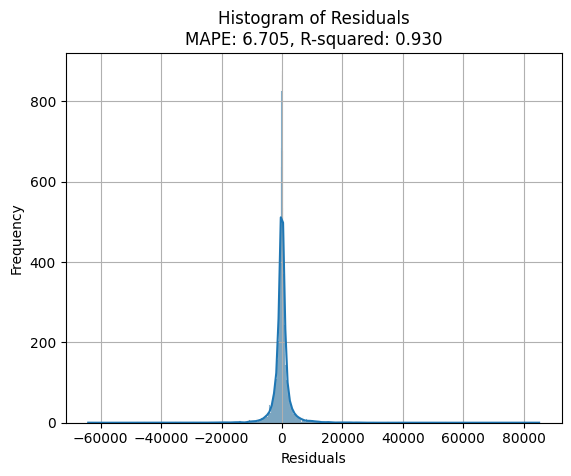

In [8]:
import seaborn as sns


# Create a histogram of residuals with MAE and MAPE
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals\nMAPE: {:.3f}, R-squared: {:.3f}".format(mape, r2))
plt.grid(True)

# Save the trained model

In [ ]:
import lightgbm as lgb
import joblib

# Train the LightGBM model as you did before
# ...

# Save the trained model to a file
model_filename = "lgb_model.pkl"
joblib.dump(model, model_filename)

# You can also save the column names of your features if needed
column_names_filename = "column_names.pkl"
joblib.dump(X.columns, column_names_filename)


# Load the trained model and make actual predictions

In [ ]:
import lightgbm as lgb
import joblib
import pandas as pd

# Load the saved model
model_filename = "lgb_model.pkl"
model = joblib.load(model_filename)

# Load the column names if needed
column_names_filename = "column_names.pkl"
column_names = joblib.load(column_names_filename)

# Create a new DataFrame with your independent features for prediction
new_data = pd.DataFrame({
    'Feature1': [value1],
    'Feature2': [value2],
    # Add more features as needed
})

# Make predictions using the loaded model
predictions = model.predict(new_data)

# The 'predictions' variable now contains the predicted 'Sell_Price' values for the new data
print(predictions)


In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you have already loaded it into a DataFrame called 'df')
# Replace 'df' with your actual DataFrame name
df = data_officetel

# Split the data into features (X) and target variable (y)
X = df.drop("Sell_Price", axis=1)
y = df["Sell_Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=283)

# Set hyperparameters for XGBoost model (adjust these based on your requirements)
params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    # Add other hyperparameters as per your requirement
}

# Perform RandomizedSearchCV for hyperparameter tuning
model_xgb = xgb.XGBRegressor()
random_grid = {
    'n_estimators': (300, 1500),
    'learning_rate': (0.01, 0.1),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'gamma': (0, 1),
    'subsample': (0.6, 1),
    'colsample_bytree': (0.6, 1),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1)
}

rscv = RandomizedSearchCV(estimator=model_xgb,
                          param_distributions=random_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_iter=100,
                          n_jobs=-1,
                          verbose=1,
                          random_state=742)

rscv.fit(X_train, y_train)

print("Best parameters found: ", rscv.best_params_)

# Train the model using XGBoost with best parameters
model = xgb.XGBRegressor(**params, **rscv.best_params_)
model.fit(X_train, y_train)

# Make predictions on the testing set using trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics: MAE (Mean Absolute Error), RMSE (Root Mean Squared Error),
# MAPE (Mean Absolute Percentage Error), R-Squared

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-Squared:", r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sell_Price')
plt.ylabel('Predicted Sell_Price')
plt.title('Actual vs Predicted Sell_Price')
plt.show()

# Create a histogram of residuals with MAE and MAPE
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals\nMAPE: {:.3f}, R-squared: {:.3f}".format(mape, r2))
plt.grid(True)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
